In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_exp1 = pd.read_csv("resultados/exp1.csv");
df_exp2 = pd.read_csv("resultados/experimento_separados.csv")

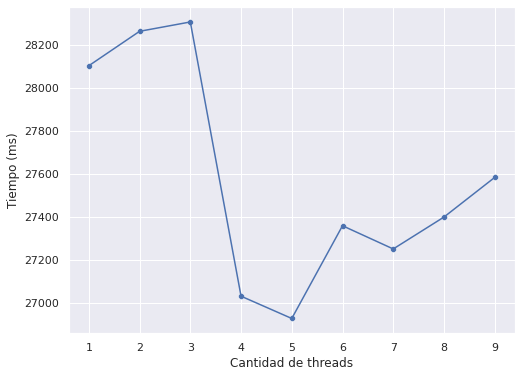

In [50]:
fig = sns.scatterplot(data=df_exp1, x="cant_threads", y="tiempo_carga")
fig = sns.lineplot(data=df_exp1, x="cant_threads", y="tiempo_carga")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
plt.savefig("graficos/cant-threads-vs-tiempo-carga.svg");

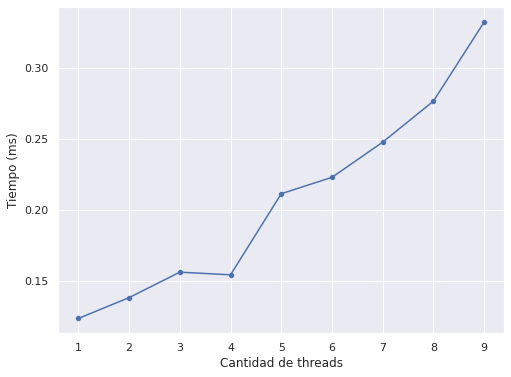

In [51]:
fig = sns.scatterplot(data=df_exp1, x="cant_threads", y="tiempo_max")
fig = sns.lineplot(data=df_exp1, x="cant_threads", y="tiempo_max")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
plt.savefig("graficos/cant-threads-vs-tiempo-max.svg");

In [18]:
cant_archivos = []
for i in range(1, 11):
    n = 2**i
    for j in range(19):
        cant_archivos.append(n)
df_exp2["cant_archivos"] = cant_archivos

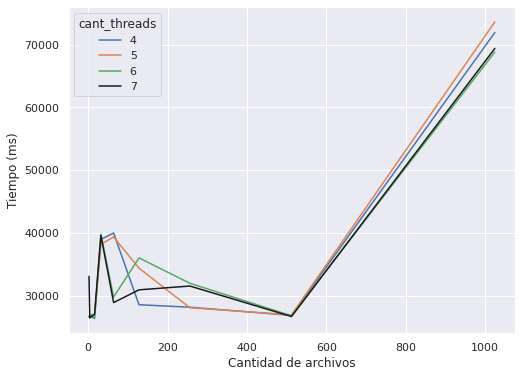

In [52]:
df_exp2_aux = df_exp2[(df_exp2["cant_threads"] > 3) & (df_exp2["cant_threads"] < 8)]
fig = sns.lineplot(data=df_exp2_aux, x="cant_archivos", y="tiempo_carga", hue="cant_threads", palette=["C0", "C1", "C2", "k"])
fig.set(xlabel='Cantidad de archivos', ylabel='Tiempo (ms)');
plt.savefig("graficos/exp2.svg");

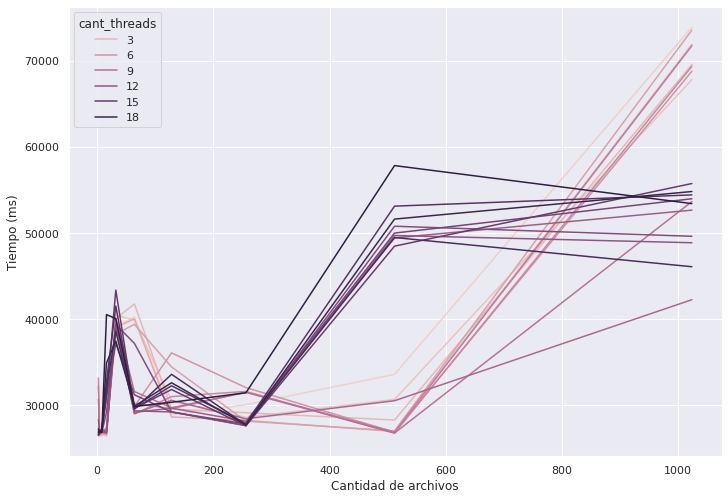

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.lineplot(data=df_exp2, x="cant_archivos", y="tiempo_carga", hue="cant_threads")
fig.set(xlabel='Cantidad de archivos', ylabel='Tiempo (ms)');
plt.savefig("graficos/exp2.svg");

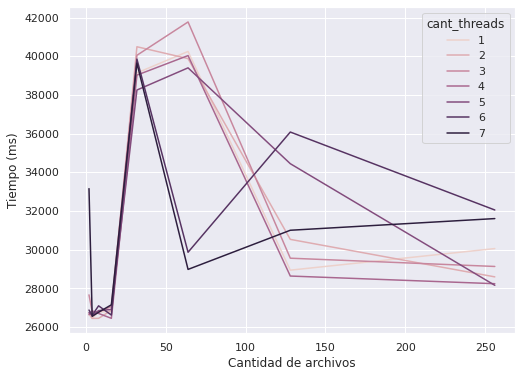

In [62]:
df_exp2_aux1 = df_exp2[(df_exp2["cant_threads"] < 8) & (df_exp2["cant_archivos"] < 300)]
fig = sns.lineplot(data=df_exp2_aux1, x="cant_archivos", y="tiempo_carga", hue="cant_threads")
fig.set(xlabel='Cantidad de archivos', ylabel='Tiempo (ms)');
plt.savefig("graficos/exp2-baja.svg");

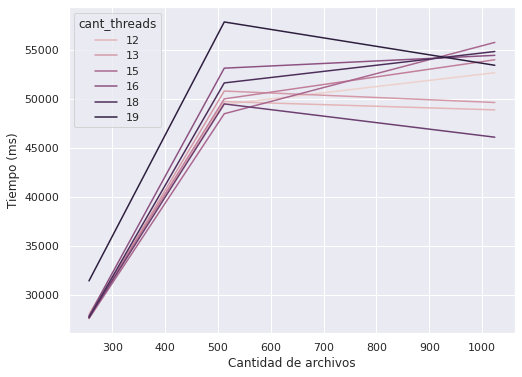

In [65]:
df_exp2_aux1 = df_exp2[(df_exp2["cant_threads"] > 10) & (df_exp2["cant_archivos"] > 200)]
fig = sns.lineplot(data=df_exp2_aux1, x="cant_archivos", y="tiempo_carga", hue="cant_threads")
fig.set(xlabel='Cantidad de archivos', ylabel='Tiempo (ms)');
plt.savefig("graficos/exp2-alta.svg");